In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Understanding the data

## Dataset used: https://www.kaggle.com/datasets/remypereira/mma-dataset-2023-ufc/

### I took inspiration and compared my results to the following other projects utilizing this dataset: https://www.kaggle.com/code/lucadeoliveira/ufc-machine-learning  https://www.kaggle.com/code/remypereira/battle-of-the-sexes-does-gender-affect-fights https://www.kaggle.com/code/miroslavkirnak/ufc-eda-and-prediction

## Dataset with each UFC Event 

In [2]:
event_data = pd.read_csv("ufc_event_data.csv", sep= ',', parse_dates=True)
event_data.head()

,event_id,event_name,event_date,event_city,event_state,event_country,event_url
0,665,UFC Fight Night: Dawson vs. Green,2023-10-07,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/c8a49ff2acb6...
1,664,UFC Fight Night: Fiziev vs. Gamrot,2023-09-23,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/c945adc22c2b...
2,663,UFC Fight Night: Grasso vs. Shevchenko 2,2023-09-16,Las Vegas,Nevada,USA,http://ufcstats.com/event-details/8fa2b0657236...
3,662,UFC 293: Adesanya vs. Strickland,2023-09-09,Sydney,New South Wales,Australia,http://ufcstats.com/event-details/ece280745f87...
4,661,UFC Fight Night: Gane vs. Spivac,2023-09-02,Paris,Ile-de-France,France,http://ufcstats.com/event-details/ef61d9f5176b...


In [3]:
print("Number of Samples:: ", event_data.shape[0])
print("Number of features: ", event_data.shape[1]-1)


Number of Samples::  665
Number of features:  6


## Dataset with every UFC fighter 

In [4]:
fighter_data = pd.read_csv("ufc_fighter_data.csv")
fighter_data.tail()

,fighter_id,fighter_f_name,fighter_l_name,fighter_nickname,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_dob,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_url
4102,5,Dave,Zitanick,NaN,NaN,170.0,NaN,NaN,1980-03-05,5,7,0,1.0,http://ufcstats.com/fighter-details/be124bdd60...
4103,4,Alex,Zuniga,NaN,NaN,145.0,NaN,NaN,NaN,6,3,0,NaN,http://ufcstats.com/fighter-details/02d808afb9...
4104,3,George,Zuniga,NaN,175.26,185.0,NaN,NaN,NaN,3,1,0,NaN,http://ufcstats.com/fighter-details/1291dd6b8a...
4105,2,Allan,Zuniga,Tigre,170.18,155.0,177.80,Orthodox,1992-04-04,13,1,0,NaN,http://ufcstats.com/fighter-details/523af801b3...
4106,1,Virgil,Zwicker,RezDog,187.96,205.0,187.96,NaN,1982-06-26,15,6,1,NaN,http://ufcstats.com/fighter-details/0c277f3ff6...


In [5]:
print("Number of Samples:: ", fighter_data.shape[0])
print("Number of features: ", fighter_data.shape[1]-1)
print(fighter_data.columns)

Number of Samples::  4107
Number of features:  13
Index(['fighter_id', 'fighter_f_name', 'fighter_l_name', 'fighter_nickname',
       'fighter_height_cm', 'fighter_weight_lbs', 'fighter_reach_cm',
       'fighter_stance', 'fighter_dob', 'fighter_w', 'fighter_l', 'fighter_d',
       'fighter_nc_dq', 'fighter_url'],
      dtype='object')


## Dataset with detailed statistics for each fighter in a fight (2 entries per fight)

In [6]:
fight_st_data = pd.read_csv("ufc_fight_stat_data.csv")
fight_st_data.head()

,fight_stat_id,fight_id,fighter_id,knockdowns,total_strikes_att,total_strikes_succ,sig_strikes_att,sig_strikes_succ,takedown_att,takedown_succ,submission_att,reversals,ctrl_time,fight_url
0,14436,7218,2976.0,0.0,34.0,19.0,32.0,18.0,0.0,0.0,0.0,0.0,0:00,http://ufcstats.com/fight-details/23a604f46028...
1,14435,7218,2884.0,0.0,42.0,17.0,40.0,16.0,6.0,1.0,0.0,0.0,1:28,http://ufcstats.com/fight-details/23a604f46028...
2,14434,7217,1662.0,0.0,59.0,37.0,40.0,23.0,15.0,5.0,1.0,0.0,7:33,http://ufcstats.com/fight-details/da1b37edb8cc...
3,14433,7217,2464.0,0.0,72.0,32.0,55.0,18.0,0.0,0.0,0.0,1.0,2:11,http://ufcstats.com/fight-details/da1b37edb8cc...
4,14432,7216,981.0,0.0,130.0,90.0,102.0,70.0,1.0,1.0,0.0,0.0,2:03,http://ufcstats.com/fight-details/d8335b728604...


In [7]:
print("Number of Samples:: ", fight_st_data.shape[0])
print("Number of features: ", fight_st_data.shape[1]-1)
print(fight_st_data.columns)

Number of Samples::  14436
Number of features:  13
Index(['fight_stat_id', 'fight_id', 'fighter_id', 'knockdowns',
       'total_strikes_att', 'total_strikes_succ', 'sig_strikes_att',
       'sig_strikes_succ', 'takedown_att', 'takedown_succ', 'submission_att',
       'reversals', 'ctrl_time', 'fight_url'],
      dtype='object')


## Dataset with general information surrounding each fight in the UFC

In [8]:
fight_data = pd.read_csv("ufc_fight_data.csv")
fight_data.head()

,fight_id,event_id,referee,f_1,f_2,winner,num_rounds,title_fight,weight_class,gender,result,result_details,finish_round,finish_time,fight_url
0,7218,664,Herb Dean,2976.0,2884.0,2884.0,5,F,Lightweight,M,KO/TKO,to \n Leg Injury,2,2:03,http://ufcstats.com/fight-details/23a604f46028...
1,7217,664,Mark Smith,1662.0,2464.0,1662.0,3,F,Featherweight,M,Decision,Unanimous,3,5:00,http://ufcstats.com/fight-details/da1b37edb8cc...
2,7216,664,Kerry Hatley,981.0,179.0,981.0,3,F,Women's Strawweight,F,KO/TKO,Punches to Head From Mount,2,2:42,http://ufcstats.com/fight-details/d8335b728604...
3,7215,664,Dan Miragliotta,3831.0,2974.0,3831.0,3,F,Welterweight,M,Submission,Rear Naked Choke,2,4:32,http://ufcstats.com/fight-details/bf647be41de3...
4,7214,664,Herb Dean,1108.0,2320.0,2320.0,3,F,Featherweight,M,Submission,Guillotine Choke From Bottom Guard,1,3:12,http://ufcstats.com/fight-details/6e1bf1b163b3...


In [9]:
print("Number of Samples:: ", fight_data.shape[0])
print("Number of features: ", fight_data.shape[1]-1)
print(fight_data.columns)

Number of Samples::  7218
Number of features:  14
Index(['fight_id', 'event_id', 'referee', 'f_1', 'f_2', 'winner', 'num_rounds',
       'title_fight', 'weight_class', 'gender', 'result', 'result_details',
       'finish_round', 'finish_time', 'fight_url'],
      dtype='object')


In [10]:
print(f"From {event_data.event_date.min()} to {event_data.event_date.max()} there were {len(fight_data)} fights in total")
print(f"Total number of fighters in all fights: {fighter_data.shape[0]}")

From 1994-03-11 to 2023-10-07 there were 7218 fights in total
Total number of fighters in all fights: 4107


# Data Preprocessing

## Removing unnecessary columns, data cleanup, etc

In [11]:
fighter_data['fighter_full_name'] = fighter_data['fighter_f_name'] + ' ' + fighter_data['fighter_l_name']
fighter_data = fighter_data.drop(['fighter_f_name', 'fighter_l_name', 'fighter_dob'], axis=1)

df = pd.merge(fight_data, fight_st_data, how='outer', on='fight_id')
df = pd.merge(df, fighter_data, how='outer', on='fighter_id')

df = df.drop(['fighter_url'], axis=1)

df['ctrl_time'] = df['ctrl_time'].replace('NULL', '0:00')
df['ctrl_time'] = df['ctrl_time'].replace('--', '0:00')
df['finish_time'] = df['finish_time'].astype(str)
df['ctrl_time'] = df['ctrl_time'].astype(str)


df[['finish_minutes', 'finish_seconds']] = df['finish_time'].str.split(':', expand=True).astype(float)
df[['ctrl_minutes', 'ctrl_seconds']] = df['ctrl_time'].str.split(':', expand=True).astype(float)

df['finish_time'] = 60 * df['finish_minutes'] + df['finish_seconds'] + 300 * df['finish_round']
df['ctrl_time'] = 60 * df['ctrl_minutes'] + df['ctrl_seconds']

df = df.drop(['finish_minutes', 'finish_seconds', 'ctrl_minutes', 'ctrl_seconds'], axis=1)


In [12]:
df['opponent_id'] = np.nan

na_or_null = df['f_1'].isna() | df['f_1'].isnull()
df.loc[~na_or_null, 'opponent_id'] = np.where(df.loc[~na_or_null, 'f_1'] == df.loc[~na_or_null, 'fighter_id'],
                                               df.loc[~na_or_null, 'f_2'], df.loc[~na_or_null, 'f_1'])
df['opponent_full_name'] = fighter_data.loc[fighter_data['fighter_id'].isin(df['opponent_id']), 'fighter_full_name']

# Removing some irrelevant columns
df = df.drop(['referee', 'f_1', 'f_2', 'num_rounds', 'result_details',
              'finish_round', 'fighter_nickname', 'fight_url_x', 'fight_url_y'], axis=1)
df.head()


,fight_id,event_id,winner,title_fight,weight_class,gender,result,finish_time,fight_stat_id,fighter_id,...,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_full_name,opponent_id,opponent_full_name
0,7218.0,664.0,2884.0,F,Lightweight,M,KO/TKO,723.0,14436.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2884.0,NaN
1,6922.0,639.0,2902.0,F,Lightweight,M,Decision,1200.0,13843.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2902.0,Danny Abbadi
2,6585.0,611.0,2976.0,F,Lightweight,M,KO/TKO,1518.0,13169.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,3185.0,NaN
3,6279.0,586.0,2976.0,F,Lightweight,M,KO/TKO,1040.0,12557.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,1042.0,David Abbott
4,6110.0,572.0,2976.0,F,Lightweight,M,Decision,1200.0,12219.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2728.0,NaN


## Creating some statistics and skills for fighters that we can use for prediction, we need to do this because so far the data just contains the results of previous fights, so we can create some features that will be more suitable for predicting future fights. I am going to create a function that builds a dataframe with some essential fight statistics for each fighter, and then use this to add more features such as strike accuracy, significant strike accuracy, averages for strikes per match, etc.

In [13]:
def skills(fighter_id): 
    # time_total = (fight_data["finish_time"][(fight_data[""])
    total_strikes_att = fight_st_data["total_strikes_att"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_knockdowns = fight_st_data["knockdowns"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_strikes_succ = fight_st_data["total_strikes_succ"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_sig_strikes_att = fight_st_data["sig_strikes_att"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_sig_strikes = fight_st_data["sig_strikes_succ"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_takedown_att = fight_st_data["takedown_att"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_takedown_succ = fight_st_data["takedown_succ"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_submission_att = fight_st_data["submission_att"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    total_reversals = fight_st_data["reversals"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    #fight_st_data["ctrl_time"] = pd.to_timedelta(fight_st_data["ctrl_time"])
    total_ctrl_time = fight_st_data["ctrl_time"][(fight_st_data["fighter_id"]==fighter_id)].sum()
    overall_fighter_data = [total_strikes_att,total_knockdowns, total_strikes_succ, total_sig_strikes_att,
                           total_sig_strikes,total_takedown_att,total_takedown_succ, total_submission_att,
                           total_reversals, total_ctrl_time]
    #print(overall_fighter_data)
    fighter_skills = pd.DataFrame([overall_fighter_data], columns = ['total_strikes_att', 'total_knockdowns','total_strikes_succ',
                                                                  'total_sig_strikes_att', 'total_sig_strikes', 'total_takedown_att',
                                                                  'total_takedown_succ', 'total_submission_att', 'total_reversals', 'total_ctrl_time'])
    
    return fighter_skills


fighter_ids = range(1, len(df) + 1)
my_stats_df = pd.DataFrame({'fighter_id': fighter_ids})
print("Number of Samples:: ", df.shape[0])
print("Number of features: ", df.shape[1]-1)


df.head()


Number of Samples::  16131
Number of features:  30


,fight_id,event_id,winner,title_fight,weight_class,gender,result,finish_time,fight_stat_id,fighter_id,...,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_full_name,opponent_id,opponent_full_name
0,7218.0,664.0,2884.0,F,Lightweight,M,KO/TKO,723.0,14436.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2884.0,NaN
1,6922.0,639.0,2902.0,F,Lightweight,M,Decision,1200.0,13843.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2902.0,Danny Abbadi
2,6585.0,611.0,2976.0,F,Lightweight,M,KO/TKO,1518.0,13169.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,3185.0,NaN
3,6279.0,586.0,2976.0,F,Lightweight,M,KO/TKO,1040.0,12557.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,1042.0,David Abbott
4,6110.0,572.0,2976.0,F,Lightweight,M,Decision,1200.0,12219.0,2976.0,...,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2728.0,NaN


## Create accuracy measures for strikes by percentage, and average number of strikes for each fighter

In [14]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

custom_fighter_stats = pd.DataFrame()


def average_stat(df, a, b):
    #df[b] = df[b].fillna(0)
    grouped_df = df.groupby('fighter_id')[b].mean()
    custom_fighter_stats[a] = grouped_df
    return custom_fighter_stats

def percentage_stat(df, a, b, c, d):
    df_filled = df.copy()
    df_filled[b] = df_filled[b].fillna(0)
    grouped_df = df_filled.groupby('fighter_id')[[b, c]].transform('mean')
    df_filled[a] = grouped_df[b] / grouped_df[c]

    custom_fighter_stats[d] = df_filled.groupby('fighter_id')[a].mean()
    custom_fighter_stats[d] = custom_fighter_stats[d].fillna(0)

    return custom_fighter_stats

custom_fighter_stats =  percentage_stat(df,'acc_strike', 'total_strikes_succ', 'total_strikes_att', 'strike_perc')
custom_fighter_stats = percentage_stat(df,'acc_sigstrike', 'sig_strikes_succ', 'sig_strikes_att', 'sigstrike_perc')
custom_fighter_stats = percentage_stat(df,'acc_td', 'takedown_succ', 'takedown_att', 'takedown_perc')
    
custom_fighter_stats = average_stat(df, 'strike_avg', 'total_strikes_succ')
custom_fighter_stats = average_stat(df,'sig_strike_avg', 'sig_strikes_succ')
custom_fighter_stats = average_stat(df,'knockdown_avg', 'knockdowns')
custom_fighter_stats = average_stat(df,'takedown_avg', 'takedown_succ')
custom_fighter_stats = average_stat(df,'sub_avg', 'submission_att')
custom_fighter_stats = average_stat(df,'reversal_avg', 'reversals')
custom_fighter_stats = average_stat(df,'control_avg', 'ctrl_time')
custom_fighter_stats = average_stat(df,'finish_avg', 'finish_time')

pd.set_option('display.max_columns', None)
custom_fighter_stats.head()

,strike_perc,sigstrike_perc,takedown_perc,strike_avg,sig_strike_avg,knockdown_avg,takedown_avg,sub_avg,reversal_avg,control_avg,finish_avg
fighter_id,,,,,,,,,,,
1.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2.0,0.632653,0.526786,0.0,93.0,59.0,0.0,0.0,1.0,0.0,0.0,1200.0
3.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5.0,0.000000,0.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Calculate strikes per minute and win to loss/draw/disqualification/no contest ratio

In [15]:
custom_fighter_stats['strike_per_minute'] = custom_fighter_stats['strike_avg'] / (custom_fighter_stats['finish_avg'] / 60)
custom_fighter_stats['sig_strike_per_minute'] = custom_fighter_stats['sig_strike_avg'] / (custom_fighter_stats['finish_avg'] / 60)

#custom_fighter_stats['win_ratio'] = fighter_data['fighter_w'] / fighter_data.iloc[:, 7:10].sum(axis=1)

condition = (fighter_data.iloc[:, 7:10].sum(axis=1) == 0)
custom_fighter_stats['win_ratio'] = np.where(condition, fighter_data['fighter_w'], fighter_data['fighter_w'] / fighter_data.iloc[:, 7:10].sum(axis=1))

fighter_data.iloc[:, 6:10].head()
#custom_fighter_stats.head() 

,fighter_w,fighter_l,fighter_d,fighter_nc_dq
0,5,3,0,NaN
1,4,6,0,NaN
2,28,4,0,NaN
3,10,15,0,NaN
4,5,0,0,1.0


In [16]:
custom_fighter_stats = custom_fighter_stats.reset_index()
custom_fighter_stats.tail()

,fighter_id,strike_perc,sigstrike_perc,takedown_perc,strike_avg,sig_strike_avg,knockdown_avg,takedown_avg,sub_avg,reversal_avg,control_avg,finish_avg,strike_per_minute,sig_strike_per_minute,win_ratio
4102,4103.0,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.625000
4103,4104.0,0.583490,0.444444,0.625,17.277778,8.666667,0.222222,0.555556,0.222222,0.055556,6.833333,517.944444,2.001502,1.003969,2.000000
4104,4105.0,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.000000
4105,4106.0,0.459459,0.380645,0.000,42.500000,29.500000,0.000000,0.000000,0.000000,0.000000,55.000000,838.000000,3.042959,2.112172,13.000000
4106,4107.0,0.000000,0.000000,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.142857


## Duplicating dataframe with new features we created, adding opponent prefix to the features, and then merging it with the original dataframe

In [17]:
opp_stats_df = custom_fighter_stats.copy()
opp_stats_df = opp_stats_df.reset_index()

opp_stats_df.columns = ['opp_' + col if col != 'fighter_id' else col for col in opp_stats_df.columns]

#custom_fighter_stats
# df = pd.merge(df, custom_fighter_stats, left_on='fighter_id', right_on='fighter_id', how='outer')
# df = pd.merge(df, opp_stats_df, left_on='opponent_id', right_on='fighter_id', how='outer')
df = pd.merge(df, custom_fighter_stats, on='fighter_id', how='outer', suffixes=('', '_opp'))

# Merge opponent_stats_df into df based on opponent_id
df = pd.merge(df, opp_stats_df, left_on='opponent_id', right_on='fighter_id', how='outer', suffixes=('', '_opp'))


pd.set_option('display.max_rows', None)

saved_df = df.copy()

df = df.drop(columns=['fighter_id_opp', 'opp_index', 'opponent_full_name'])
df.head()

,fight_id,event_id,winner,title_fight,weight_class,gender,result,finish_time,fight_stat_id,fighter_id,knockdowns,total_strikes_att,total_strikes_succ,sig_strikes_att,sig_strikes_succ,takedown_att,takedown_succ,submission_att,reversals,ctrl_time,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_w,fighter_l,fighter_d,fighter_nc_dq,fighter_full_name,opponent_id,strike_perc,sigstrike_perc,takedown_perc,strike_avg,sig_strike_avg,knockdown_avg,takedown_avg,sub_avg,reversal_avg,control_avg,finish_avg,strike_per_minute,sig_strike_per_minute,win_ratio,opp_strike_perc,opp_sigstrike_perc,opp_takedown_perc,opp_strike_avg,opp_sig_strike_avg,opp_knockdown_avg,opp_takedown_avg,opp_sub_avg,opp_reversal_avg,opp_control_avg,opp_finish_avg,opp_strike_per_minute,opp_sig_strike_per_minute,opp_win_ratio
0,7218.0,664.0,2884.0,F,Lightweight,M,KO/TKO,723.0,14436.0,2976.0,0.0,34.0,19.0,32.0,18.0,0.0,0.0,0.0,0.0,0.0,172.72,155.0,180.34,Switch,12.0,3.0,0.0,NaN,Rafael Fiziev,2884.0,0.532119,0.516550,0.400000,61.666667,57.222222,0.222222,0.222222,0.000000,0.000000,51.444444,1001.333333,3.695073,3.428762,2.333333,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6
1,6893.0,637.0,2884.0,F,Lightweight,M,Decision,1200.0,13785.0,332.0,1.0,119.0,62.0,97.0,40.0,1.0,0.0,0.0,0.0,32.0,190.50,155.0,195.58,Southpaw,13.0,7.0,0.0,NaN,Jalin Turner,2884.0,0.524004,0.477612,0.500000,51.300000,41.600000,0.500000,0.400000,0.700000,0.100000,65.600000,765.800000,4.019326,3.259337,4.000000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6
2,5713.0,536.0,2145.0,F,Lightweight,M,Decision,1200.0,11425.0,2145.0,1.0,93.0,43.0,86.0,37.0,1.0,0.0,0.0,0.0,1.0,180.34,155.0,182.88,Orthodox,12.0,4.0,0.0,NaN,Guram Kutateladze,2884.0,0.482609,0.458716,0.181818,74.000000,66.666667,0.333333,0.666667,0.000000,0.000000,61.000000,1165.666667,3.808979,3.431513,1.714286,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6
3,6563.0,609.0,2884.0,F,Lightweight,M,Decision,1800.0,13126.0,350.0,1.0,264.0,110.0,247.0,95.0,8.0,1.0,0.0,0.0,99.0,170.18,155.0,182.88,Orthodox,20.0,3.0,0.0,NaN,Arman Tsarukyan,2884.0,0.585881,0.480000,0.363636,89.444444,52.000000,0.222222,3.111111,0.000000,0.000000,317.333333,1116.777778,4.805492,2.793752,1.428571,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6
4,6725.0,623.0,3296.0,F,Lightweight,M,Decision,1200.0,13450.0,3296.0,1.0,138.0,67.0,130.0,59.0,0.0,0.0,0.0,0.0,34.0,177.80,155.0,182.88,Southpaw,22.0,5.0,1.0,NaN,Beneil Dariush,2884.0,0.536530,0.488339,0.342105,44.761905,32.904762,0.285714,1.238095,0.571429,0.047619,227.761905,839.285714,3.200000,2.352340,2.625000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6


## Calculating stat differentials between fighters in a fight

In [18]:
df['strike_diff'] = df['strike_avg'] - df['opp_strike_avg']
df['sig_strike_diff'] = df['sig_strike_avg'] - df['opp_sig_strike_avg']
df['spm_diff'] = df['strike_per_minute'] - df['opp_strike_per_minute']
df['sspm_diff'] = df['sig_strike_per_minute'] - df['opp_sig_strike_per_minute']
df['knockdown_diff'] = df['knockdown_avg'] - df['opp_knockdown_avg']
df['takedown_diff'] = df['takedown_avg'] - df['opp_takedown_avg']
df['sub_diff'] = df['sub_avg'] - df['opp_sub_avg']
df['control_diff'] = df['control_avg'] - df['opp_control_avg']
df.head()

df = df.drop(columns=['fighter_l', 'fighter_d', 'fighter_nc_dq'])
df['fighter_stance'] = df['fighter_stance'].replace('NULL', 'Unknown')

#df[['fighter_stance', 'title_fight', 'gender', 'winner', 'result']] = df[['fighter_stance', 'title_fight', 'gender', 'winner', 'result']].astype('category')

## "Missingness" of the data - we can see that there is a good chunk of missing data from the overall datasets. Upon further inspection, this is because in the early days of the UFC they did not track all of the same information that is tracked today. These rows with missing data ended up just being omitted from the training data due to the fact that most of these earlier fighters aren't active today, so for simplicity's sake I removed them (green is missing information in the graph)

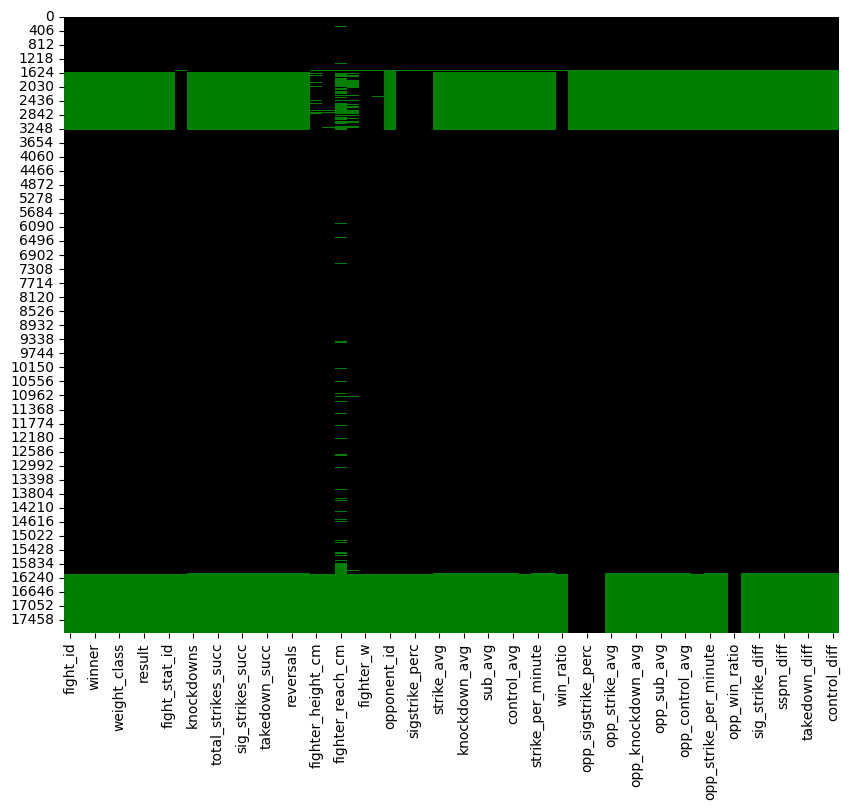

(13064, 63)


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 8))
sns.heatmap(df.isnull(), cmap=['black', 'green'], cbar=False)
plt.show()


df = df.dropna()
print(df.shape)


In [20]:
df.head()


,fight_id,event_id,winner,title_fight,weight_class,gender,result,finish_time,fight_stat_id,fighter_id,knockdowns,total_strikes_att,total_strikes_succ,sig_strikes_att,sig_strikes_succ,takedown_att,takedown_succ,submission_att,reversals,ctrl_time,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_stance,fighter_w,fighter_full_name,opponent_id,strike_perc,sigstrike_perc,takedown_perc,strike_avg,sig_strike_avg,knockdown_avg,takedown_avg,sub_avg,reversal_avg,control_avg,finish_avg,strike_per_minute,sig_strike_per_minute,win_ratio,opp_strike_perc,opp_sigstrike_perc,opp_takedown_perc,opp_strike_avg,opp_sig_strike_avg,opp_knockdown_avg,opp_takedown_avg,opp_sub_avg,opp_reversal_avg,opp_control_avg,opp_finish_avg,opp_strike_per_minute,opp_sig_strike_per_minute,opp_win_ratio,strike_diff,sig_strike_diff,spm_diff,sspm_diff,knockdown_diff,takedown_diff,sub_diff,control_diff
0,7218.0,664.0,2884.0,F,Lightweight,M,KO/TKO,723.0,14436.0,2976.0,0.0,34.0,19.0,32.0,18.0,0.0,0.0,0.0,0.0,0.0,172.72,155.0,180.34,Switch,12.0,Rafael Fiziev,2884.0,0.532119,0.516550,0.400000,61.666667,57.222222,0.222222,0.222222,0.000000,0.000000,51.444444,1001.333333,3.695073,3.428762,2.333333,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,12.416667,22.722222,0.731182,1.352533,0.097222,-3.152778,-0.125000,-110.430556
1,6893.0,637.0,2884.0,F,Lightweight,M,Decision,1200.0,13785.0,332.0,1.0,119.0,62.0,97.0,40.0,1.0,0.0,0.0,0.0,32.0,190.50,155.0,195.58,Southpaw,13.0,Jalin Turner,2884.0,0.524004,0.477612,0.500000,51.300000,41.600000,0.500000,0.400000,0.700000,0.100000,65.600000,765.800000,4.019326,3.259337,4.000000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,2.050000,7.100000,1.055435,1.183108,0.375000,-2.975000,0.575000,-96.275000
2,5713.0,536.0,2145.0,F,Lightweight,M,Decision,1200.0,11425.0,2145.0,1.0,93.0,43.0,86.0,37.0,1.0,0.0,0.0,0.0,1.0,180.34,155.0,182.88,Orthodox,12.0,Guram Kutateladze,2884.0,0.482609,0.458716,0.181818,74.000000,66.666667,0.333333,0.666667,0.000000,0.000000,61.000000,1165.666667,3.808979,3.431513,1.714286,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,24.750000,32.166667,0.845087,1.355284,0.208333,-2.708333,-0.125000,-100.875000
3,6563.0,609.0,2884.0,F,Lightweight,M,Decision,1800.0,13126.0,350.0,1.0,264.0,110.0,247.0,95.0,8.0,1.0,0.0,0.0,99.0,170.18,155.0,182.88,Orthodox,20.0,Arman Tsarukyan,2884.0,0.585881,0.480000,0.363636,89.444444,52.000000,0.222222,3.111111,0.000000,0.000000,317.333333,1116.777778,4.805492,2.793752,1.428571,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,40.194444,17.500000,1.841600,0.717523,0.097222,-0.263889,-0.125000,155.458333
4,6725.0,623.0,3296.0,F,Lightweight,M,Decision,1200.0,13450.0,3296.0,1.0,138.0,67.0,130.0,59.0,0.0,0.0,0.0,0.0,34.0,177.80,155.0,182.88,Southpaw,22.0,Beneil Dariush,2884.0,0.536530,0.488339,0.342105,44.761905,32.904762,0.285714,1.238095,0.571429,0.047619,227.761905,839.285714,3.200000,2.352340,2.625000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,-4.488095,-1.595238,0.236108,0.276112,0.160714,-2.136905,0.446429,65.886905


## Final Data Cleaning 
### Removing the data points from the fighter and opponents actual fight, since we want to be able to predict their "future" fight, so we can't use statistics from their actual fight 

In [21]:
df_final = df.drop(columns=['fight_id', 'event_id', 'result', 'fighter_full_name', 'fight_stat_id'])

df_final = df_final.drop(columns=['knockdowns','total_strikes_att','total_strikes_succ','sig_strikes_att',
                            'sig_strikes_succ',	'takedown_att','takedown_succ',
                            'submission_att','reversals','ctrl_time', 'finish_time'])

df_final['gender'] = df_final['gender'].apply(lambda x: 1 if x == 'M' else 0)
df_final['title_fight'] = df_final['title_fight'].apply(lambda x: 1 if x == 'T' else 0)
#If winner matches fighter_id then True, otherwise if the opponent is the winner set it to False
df_final['winner'] = np.where(df_final['winner'] == df_final['fighter_id'], 'T', 'F')
df_final = pd.get_dummies(df_final, columns=['fighter_stance'], prefix='stance')
df_final = pd.get_dummies(df_final, columns=['weight_class'], prefix='')

df_final.head()

,winner,title_fight,gender,fighter_id,fighter_height_cm,fighter_weight_lbs,fighter_reach_cm,fighter_w,opponent_id,strike_perc,sigstrike_perc,takedown_perc,strike_avg,sig_strike_avg,knockdown_avg,takedown_avg,sub_avg,reversal_avg,control_avg,finish_avg,strike_per_minute,sig_strike_per_minute,win_ratio,opp_strike_perc,opp_sigstrike_perc,opp_takedown_perc,opp_strike_avg,opp_sig_strike_avg,opp_knockdown_avg,opp_takedown_avg,opp_sub_avg,opp_reversal_avg,opp_control_avg,opp_finish_avg,opp_strike_per_minute,opp_sig_strike_per_minute,opp_win_ratio,strike_diff,sig_strike_diff,spm_diff,sspm_diff,knockdown_diff,takedown_diff,sub_diff,control_diff,stance_Open Stance,stance_Orthodox,stance_Southpaw,stance_Switch,_Bantamweight,_Catch Weight,_Featherweight,_Flyweight,_Heavyweight,_Light Heavyweight,_Lightweight,_Middleweight,_Open Weight,_Welterweight,_Women's Bantamweight,_Women's Featherweight,_Women's Flyweight,_Women's Strawweight
0,F,0,1,2976.0,172.72,155.0,180.34,12.0,2884.0,0.532119,0.516550,0.400000,61.666667,57.222222,0.222222,0.222222,0.000000,0.000000,51.444444,1001.333333,3.695073,3.428762,2.333333,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,12.416667,22.722222,0.731182,1.352533,0.097222,-3.152778,-0.125000,-110.430556,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False
1,F,0,1,332.0,190.50,155.0,195.58,13.0,2884.0,0.524004,0.477612,0.500000,51.300000,41.600000,0.500000,0.400000,0.700000,0.100000,65.600000,765.800000,4.019326,3.259337,4.000000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,2.050000,7.100000,1.055435,1.183108,0.375000,-2.975000,0.575000,-96.275000,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
2,T,0,1,2145.0,180.34,155.0,182.88,12.0,2884.0,0.482609,0.458716,0.181818,74.000000,66.666667,0.333333,0.666667,0.000000,0.000000,61.000000,1165.666667,3.808979,3.431513,1.714286,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,24.750000,32.166667,0.845087,1.355284,0.208333,-2.708333,-0.125000,-100.875000,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
3,F,0,1,350.0,170.18,155.0,182.88,20.0,2884.0,0.585881,0.480000,0.363636,89.444444,52.000000,0.222222,3.111111,0.000000,0.000000,317.333333,1116.777778,4.805492,2.793752,1.428571,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,40.194444,17.500000,1.841600,0.717523,0.097222,-0.263889,-0.125000,155.458333,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
4,T,0,1,3296.0,177.80,155.0,182.88,22.0,2884.0,0.536530,0.488339,0.342105,44.761905,32.904762,0.285714,1.238095,0.571429,0.047619,227.761905,839.285714,3.200000,2.352340,2.625000,0.573508,0.502732,0.306818,49.25,34.5,0.125,3.375,0.125,0.0,161.875,997.0,2.963892,2.076229,3.6,-4.488095,-1.595238,0.236108,0.276112,0.160714,-2.136905,0.446429,65.886905,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False


In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
from sklearn.model_selection import train_test_split

X = df_final.drop('winner', axis=1)
y = df_final['winner']


## Running Decision Tree Classifier by itself and then with the ADAboost ensemble method applied 

### Criteria as entropy, trying at depths 3

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=3, min_samples_leaf=5)
tree_entropy.fit(X_train, y_train)

# Train Accuracy
y_train_pred = tree_entropy.predict(X_train) 
train_acc = accuracy_score(y_train_pred, y_train)
print("Train Accuracy for Decision Tree with depth 3 and criteria as entropy Index is: ", train_acc*100)

# Test Accuracy
y_pred_entropy = tree_entropy.predict(X_test)
print("Accuracy for Decision Tree with depth 3 and criteria as entropy is: ", accuracy_score(y_test,y_pred_entropy)*100)


Train Accuracy for Decision Tree with depth 3 and criteria as entropy Index is:  65.26684164479441
Accuracy for Decision Tree with depth 3 and criteria as entropy is:  63.85204081632653


In [24]:
tree_entropy = DecisionTreeClassifier(criterion = "entropy", random_state = 50,
                               max_depth=3, min_samples_leaf=5)
tree_entropy.fit(X_train, y_train)

abc_g = AdaBoostClassifier(base_estimator=tree_entropy)

model_abc_g = abc_g.fit(X_train, y_train)

# Train Accuracy
y_train_pred = model_abc_g.predict(X_train) 
train_acc = accuracy_score(y_train_pred, y_train)
print("Train Accuracy for Decision Tree with depth 3 and criteria as entropy Index is: ", train_acc*100)

# Test Accuracy
y_pred_entropy = model_abc_g.predict(X_test)
print("Accuracy for Decision Tree with depth 3 and criteria as entropy is: ", accuracy_score(y_test,y_pred_entropy)*100)


Train Accuracy for Decision Tree with depth 3 and criteria as entropy Index is:  76.89195100612423
Accuracy for Decision Tree with depth 3 and criteria as entropy is:  64.48979591836735


### Criteria as gini, trying at depths 3

In [25]:
tree_gini = DecisionTreeClassifier(criterion = "gini", random_state = 50,
                               max_depth=3, min_samples_leaf=5)
tree_gini.fit(X_train, y_train)

abc_g = AdaBoostClassifier(base_estimator=tree_gini)

model_abc_g = abc_g.fit(X_train, y_train)

# Train Accuracy
y_train_pred = model_abc_g.predict(X_train) 
train_acc = accuracy_score(y_train_pred, y_train)
print("Train Accuracy for Decision Tree with depth 3 and criteria as gini is: ", train_acc*100)

# Test Accuracy
y_pred_gini = model_abc_g.predict(X_test)
print("Accuracy for Decision Tree with depth 3 and criteria as gini is: ", accuracy_score(y_test,y_pred_gini)*100)

Train Accuracy for Decision Tree with depth 3 and criteria as gini is:  76.93569553805774
Accuracy for Decision Tree with depth 3 and criteria as gini is:  63.85204081632653


### As we can see from the accuracy scores, there was not a big difference between using the entropy vs gini index criteria, and also applying the adaboost ensemble method does not seem to increase the accuracy by a significant amount. Overall, the decision tree did better than average at predicting fights. The reason why it doesn't do better could be explained by the inherent randomness of some UFC fights, and also more feature engineering could have been applied to hopefully increase the accuracy. 

### Feature Importance for Decision Tree with AdaBoost applied

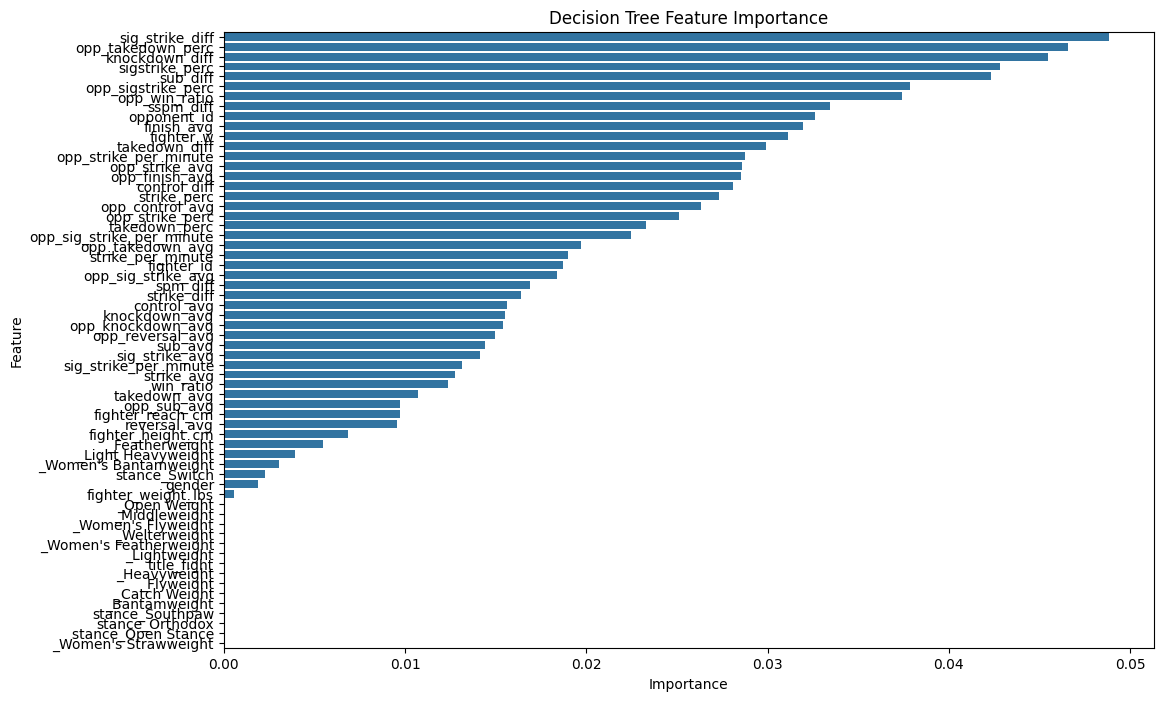

In [26]:
feature_importance = model_abc_g.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Decision Tree Feature Importance')
plt.show()

## Using Random Forest on the dataset to predict the winner given a fight 

In [27]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500, random_state=50)
forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6686224489795919


## Results of Random Forest

### The random forest performed slightly better overall when compared to the other models used. Visualizing the features with the most importance was very helpful for me, because I was able to confirm that the model chose features that make intuitive sense to consider when predicting a fight, including the significant strike differentials between the two fighters, the knockdown differential, significant strikes per minute differential, etc.  The reason why it doesn't do better could be explained by the inherent randomness of some UFC fights, and also more feature engineering could have been applied to hopefully increase the accuracy, including win/loss streak 

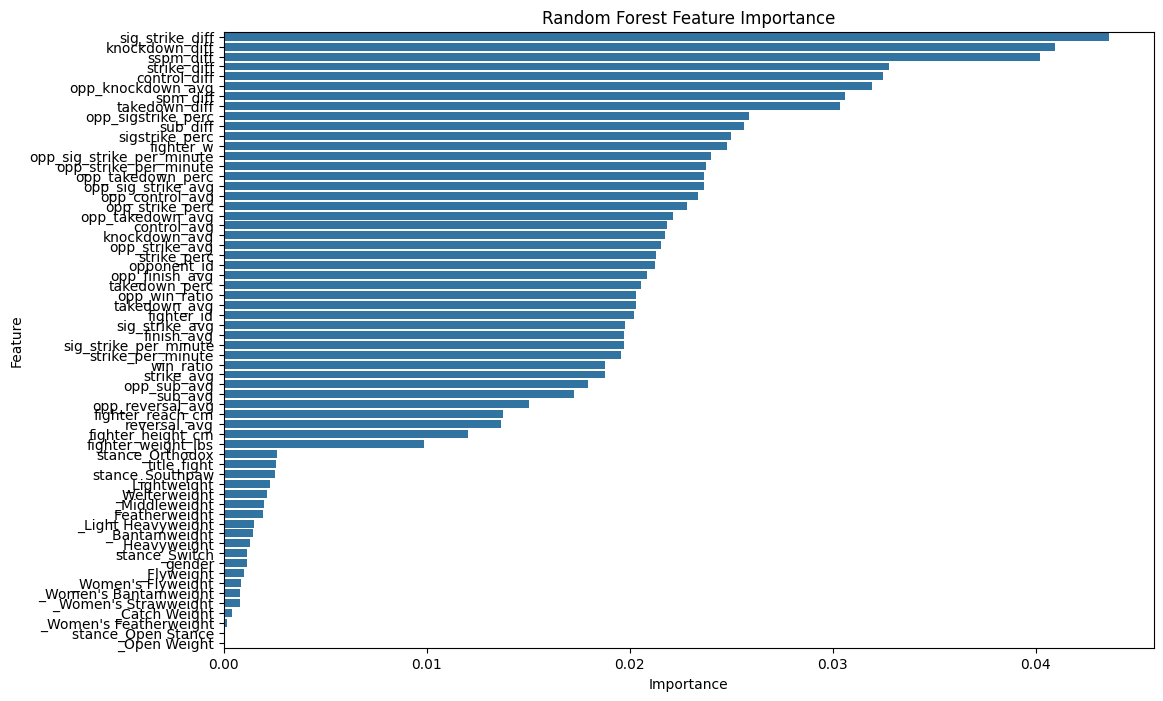

In [28]:
feature_importance = forest.feature_importances_

feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Random Forest Feature Importance')
plt.show()

## Support Vector Machines 

In [29]:
from sklearn import svm
from time import time

svc_rbf = svm.SVC(probability=True,  kernel="rbf", C=1, gamma=.0073,verbose=10)
t0 = time()
svc_rbf.fit(X_train,y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))

y_train_pred = svc_rbf.predict(X_train) 
train_acc = accuracy_score(y_train_pred, y_train)
print ("Train Accuracy is ", train_acc)

y_pred = svc_rbf.predict(X_test)

test_acc = accuracy_score(y_pred, y_test)
print ("Test Accuracy is ", test_acc)

[LibSVM].........*.*
optimization finished, #iter = 10690
obj = -3641.501017, rho = -0.109108
nSV = 7298, nBSV = 3426
Total nSV = 7298
..........*....*
optimization finished, #iter = 14310
obj = -3642.503455, rho = -0.098518
nSV = 7298, nBSV = 3447
Total nSV = 7298
........*.*
optimization finished, #iter = 9767
obj = -3642.300343, rho = -0.093501
nSV = 7294, nBSV = 3447
Total nSV = 7294
..........*...*
optimization finished, #iter = 13046
obj = -3642.146747, rho = -0.105778
nSV = 7297, nBSV = 3437
Total nSV = 7297
...........*
optimization finished, #iter = 11667
obj = -3649.766574, rho = -0.101389
nSV = 7296, nBSV = 3450
Total nSV = 7296
Line search fails in two-class probability estimates
.............*..*
optimization finished, #iter = 15461
obj = -4557.150681, rho = 0.101908
nSV = 9131, nBSV = 4315
Total nSV = 9131
Classifier trained in 44.749 seconds.
Train Accuracy is  0.9945319335083115
Test Accuracy is  0.5267857142857143


In [30]:
svc_poly = svm.SVC(probability=True,  kernel="poly", C=2.8, verbose=10)
t0 = time()
svc_poly.fit(X_train,y_train)
tt = time() - t0
print("Classifier trained in {} seconds.".format(round(tt, 3)))

y_train_pred = svc_poly.predict(X_train) 
train_acc = accuracy_score(y_train_pred, y_train)
print ("Train Accuracy is ", train_acc)

y_pred = svc_poly.predict(X_test)

test_acc = accuracy_score(y_pred, y_test)
print ("Test Accuracy is ", test_acc)

[LibSVM].........
*.....*
optimization finished, #iter = 14672
obj = -17721.252356, rho = -0.806021
nSV = 6478, nBSV = 6458
Total nSV = 6478
.........*..*......*
optimization finished, #iter = 17120
obj = -17777.457137, rho = -0.454957
nSV = 6512, nBSV = 6493
Total nSV = 6512
.........*...*....*.*
optimization finished, #iter = 16474
obj = -17582.224739, rho = -0.796673
nSV = 6433, nBSV = 6411
Total nSV = 6433
........
*..*....*
optimization finished, #iter = 13480
obj = -17665.947102, rho = -0.705146
nSV = 6465, nBSV = 6444
Total nSV = 6465
........*..*.......*...*
optimization finished, #iter = 19609
obj = -17789.556423, rho = -0.481464
nSV = 6503, nBSV = 6481
Total nSV = 6503
.........*.
*........*......*
optimization finished, #iter = 23561
obj = -22042.848652, rho = 0.668091
nSV = 8057, nBSV = 8034
Total nSV = 8057
Classifier trained in 33.266 seconds.
Train Accuracy is  0.6012685914260717
Test Accuracy is  0.5915816326530612


### Results from SVM: We can see that the SVM struggled overall with this data. In the RBF kernel, the model overfit to an extreme degree to the training data, leading to 52% accuracy in predicting the test data. The polynomial kernel performed only slightly better, due to it being slightly more simplistic

## Multi-Layer Perceptron 

In [31]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(100, ), max_iter=1000, random_state=50)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.57


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_dist = {
    'hidden_layer_sizes': [(50,), (100,), (50, 25), (100, 50, 25)],
    'activation': ['relu', 'tanh', 'logistic'],
    'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
}

mlp = MLPClassifier(max_iter=1000, random_state=50)

random_search = RandomizedSearchCV(mlp, param_distributions=param_dist, n_iter=10, cv=3, random_state=50)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
print("Best Parameters:", best_params)



Best Parameters: {'hidden_layer_sizes': (50,), 'alpha': 0.001, 'activation': 'logistic'}


In [33]:
best_mlp = MLPClassifier(max_iter=1000, random_state=50, **best_params)
best_mlp.fit(X_train, y_train)

y_pred = best_mlp.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 0.61


## I utilized Randomized Cross-Validation search with hyperparameter tuning to help improve the accuracy of the Multi-Layer Perceptron by systematically exploring different combinations of hyperparameters and model settings. It found the best parameters for the MLP and was able to improve the accuracy to 61%

## Function that will predict the winner of a fight based off the random forest model. I chose this model since it had the highest accuracy overall. It takes in two fighters by fighter id and then returns T is the first fighter is the predicted winner and F if the second fighter is the predicted winner

In [35]:
def predict_fight(a, b):
    fighter_names = df_final['fighter_id'].unique()
    #print(fighter_names)
    
    def get_fighter1_data(name):
        fighter_data = df_final[df_final['fighter_id'] == name].iloc[0]
        return fighter_data

    def get_fighter2_data(name):
        fighter_data = df_final[df_final['opponent_id'] == name].iloc[0]
        return fighter_data

    if a in fighter_names and b in fighter_names:
        print("Found both fighters", a, b)
        fighter1 = get_fighter1_data(a)
        fighter2 = get_fighter2_data(b)

        prefix = '2_'
        fighter2 = fighter2.add_prefix(prefix)
        df = pd.concat([fighter1, fighter2]).to_frame().transpose()
        df.reset_index(drop=True, inplace=True)

        df = df[[
    "title_fight",
    "gender",
    "fighter_id",
    "fighter_height_cm",
    "fighter_weight_lbs",
    "fighter_reach_cm",
    "fighter_w",
    "2_opponent_id",
    "strike_perc",
    "sigstrike_perc",
    "takedown_perc",
    "strike_avg",
    "sig_strike_avg",
    "knockdown_avg",
    "takedown_avg",
    "sub_avg",
    "reversal_avg",
    "control_avg",
    "finish_avg",
    "strike_per_minute",
    "sig_strike_per_minute",
    "win_ratio",
    "2_opp_strike_perc",
    "2_opp_sigstrike_perc",
    "2_opp_takedown_perc",
    "2_opp_strike_avg",
    "2_opp_sig_strike_avg",
    "2_opp_knockdown_avg",
    "2_opp_takedown_avg",
    "2_opp_sub_avg",
    "2_opp_reversal_avg",
    "2_opp_control_avg",
    "2_opp_finish_avg",
    "2_opp_strike_per_minute",
    "2_opp_sig_strike_per_minute",
    "2_opp_win_ratio",
    "stance_Open Stance",
    "stance_Orthodox",
    "stance_Southpaw",
    "stance_Switch",
    "_Bantamweight",
    "_Catch Weight",
    "_Featherweight",
    "_Flyweight",
    "_Heavyweight",
    "_Light Heavyweight",
    "_Lightweight",
    "_Middleweight",
    "_Open Weight",
    "_Welterweight",
    "_Women's Bantamweight",
    "_Women's Featherweight",
    "_Women's Flyweight",
    "_Women's Strawweight",
]]

    
        df['strike_diff'] = df['strike_avg'] - df['2_opp_strike_avg']
        df['sig_strike_diff'] = df['sig_strike_avg'] - df['2_opp_sig_strike_avg']
        df['spm_diff'] = df['strike_per_minute'] - df['2_opp_strike_per_minute']
        df['sspm_diff'] = df['sig_strike_per_minute'] - df['2_opp_sig_strike_per_minute']
        df['knockdown_diff'] = df['knockdown_avg'] - df['2_opp_knockdown_avg']
        df['takedown_diff'] = df['takedown_avg'] - df['2_opp_takedown_avg']
        df['sub_diff'] = df['sub_avg'] - df['2_opp_sub_avg']
        df['control_diff'] = df['control_avg'] - df['2_opp_control_avg']
        df.columns = df.columns.str.replace('2_', '')

        desired_order = [
    'title_fight', 'gender', 'fighter_id', 'fighter_height_cm', 'fighter_weight_lbs',
    'fighter_reach_cm', 'fighter_w', 'opponent_id', 'strike_perc', 'sigstrike_perc', 'takedown_perc',
    'strike_avg', 'sig_strike_avg', 'knockdown_avg', 'takedown_avg', 'sub_avg', 'reversal_avg',
    'control_avg', 'finish_avg', 'strike_per_minute', 'sig_strike_per_minute', 'win_ratio',
    'opp_strike_perc', 'opp_sigstrike_perc', 'opp_takedown_perc', 'opp_strike_avg',
    'opp_sig_strike_avg', 'opp_knockdown_avg', 'opp_takedown_avg', 'opp_sub_avg', 'opp_reversal_avg',
    'opp_control_avg', 'opp_finish_avg', 'opp_strike_per_minute', 'opp_sig_strike_per_minute',
    'opp_win_ratio', 'strike_diff', 'sig_strike_diff', 'spm_diff', 'sspm_diff', 'knockdown_diff',
    'takedown_diff', 'sub_diff', 'control_diff', 'stance_Open Stance', 'stance_Orthodox',
    'stance_Southpaw', 'stance_Switch', '_Bantamweight', '_Catch Weight', '_Featherweight',
    '_Flyweight', '_Heavyweight', '_Light Heavyweight', '_Lightweight', '_Middleweight', '_Open Weight',
    '_Welterweight', '_Women\'s Bantamweight', '_Women\'s Featherweight', '_Women\'s Flyweight',
    '_Women\'s Strawweight'
]
        
        df = df[desired_order]
        prediction = forest.predict(df)
        print(prediction)

        if prediction == 'T':
            print(f'I predict {a} wins this fight.')
        else:
            print(f'I predict {b} wins this fight.')


        return df

# # Example usage
fighter_a = 2976.0
fighter_b = 332.0
title = "FALSE"  # replace with actual title
gender = "M"  # replace with actual gender
category = "Heavyweight"  # replace with actual category
result = predict_fight(fighter_a, fighter_b)  # replace nn with the actual model
#print(result)

Found both fighters 2976.0 332.0
['T']
I predict 2976.0 wins this fight.


## UFC Austin (12/2/2023) Predictions from the trained random forest model are below! Just for fun


## The model predicted 4/9 fights correctly

In [36]:
fighter_a = 2644.0 # Veronica Hardy
fighter_b = 2502.0 # Jamey-Lyn Horth
result = predict_fight(fighter_a, fighter_b)  
#print(result)

Found both fighters 2644.0 2502.0
['F']
I predict 2502.0 wins this fight.


### Hardy vs Horth: Model was incorrect

In [37]:
fighter_a = 2778.0 # Jared Gooden
fighter_b = 334.0 # Wellington Turman

result = predict_fight(fighter_a, fighter_b)  

Found both fighters 2778.0 334.0
['T']
I predict 2778.0 wins this fight.


### Gooden vs Turman: Model was Correct

In [41]:
fighter_a = 442.0 # Miesha Tate
fighter_b = 3903.0 # Julia Avila
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 442.0 3903.0
['T']
I predict 442.0 wins this fight.


### Misha vs Julia: Model was Correct

In [42]:
fighter_a = 599.0 # Punahele Soriano 
fighter_b = 528.0 # Dustin Stoltzfus
result = predict_fight(fighter_a, fighter_b)  

Found both fighters 599.0 528.0
['T']
I predict 599.0 wins this fight.


### Stolzfus vs Soriano: Model was Incorrect

In [43]:
fighter_a = 2702.0 # Clay Guida
fighter_b = 688.0 # Joaquim Silva
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 2702.0 688.0
['T']
I predict 2702.0 wins this fight.


### Guida vs Silva: Model was Incorrect

In [44]:
fighter_a = 2861.0 # Kelvin Gastelum
fighter_b = 3694.0 # Sean Brady
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 2861.0 3694.0
['F']
I predict 3694.0 wins this fight.


### Gastelum vs Brady: Model was correct

In [45]:
fighter_a = 2961.0 # Rob Font
fighter_b = 2997.0 # Deiveson Figueiredo
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 2961.0 2997.0
['T']
I predict 2961.0 wins this fight.


### Font vs Figgy: Model was Incorrect

In [46]:
fighter_a = 332.0 # Jalin Turner
fighter_b = 2728.0 # Bobby Green  
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 332.0 2728.0
['F']
I predict 2728.0 wins this fight.


### Turner vs Green: Model was Incorrect

In [47]:
fighter_a = 3296.0 # Beneil Dariush
fighter_b = 350.0 # Arman Tsarukyan 
result = predict_fight(fighter_a, fighter_b)  


Found both fighters 3296.0 350.0
['F']
I predict 350.0 wins this fight.


### Dariush vs Arman: Model was correct